In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [3]:
df = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=45512&md5_url=9b13ae1ae040125b8611f9576377eb81')
df.head(10)
df.drop(index=10)

import re
column = df['觀光']
for i in range(df.shape[0]):
    column[i] = re.sub(',','', column[i])

df['觀光'] = column

df['觀光'] = df['觀光'].astype(int)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<BarContainer object of 10 artists>

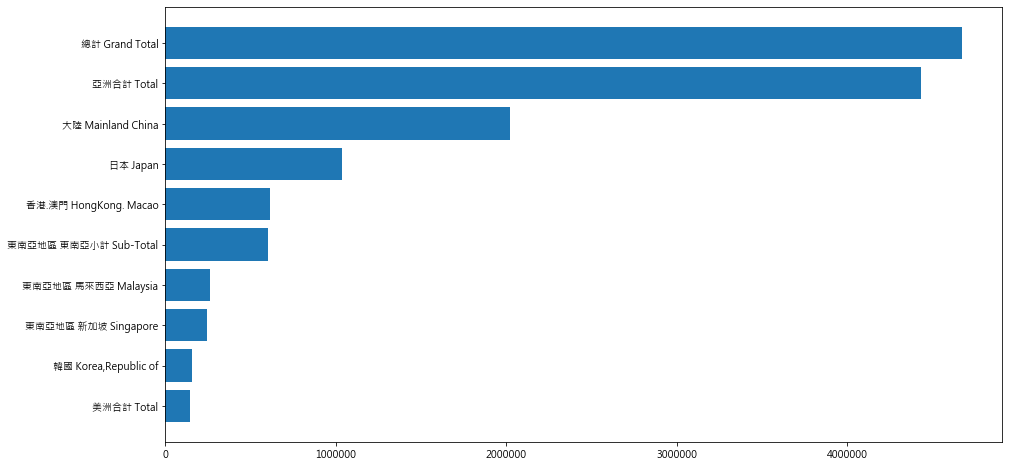

In [4]:
df['年別'] = df.astype(str)
basic = df[df['年別']=='2012'].sort_values('觀光').tail(10)
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(basic['細分'], basic['觀光'])

0 225176 美洲合計 Total
1 292240 東南亞地區 新加坡 Singapore
2 339710 東南亞地區 馬來西亞 Malaysia
3 693224 韓國 Korea,Republic of
4 867552 東南亞地區 東南亞小計 Sub-Total
5 1379233 日本 Japan
6 1397233 香港.澳門 HongKong. Macao
7 2845547 大陸 Mainland China
8 7192696 亞洲合計 Total
9 7560753 總計 Grand Total


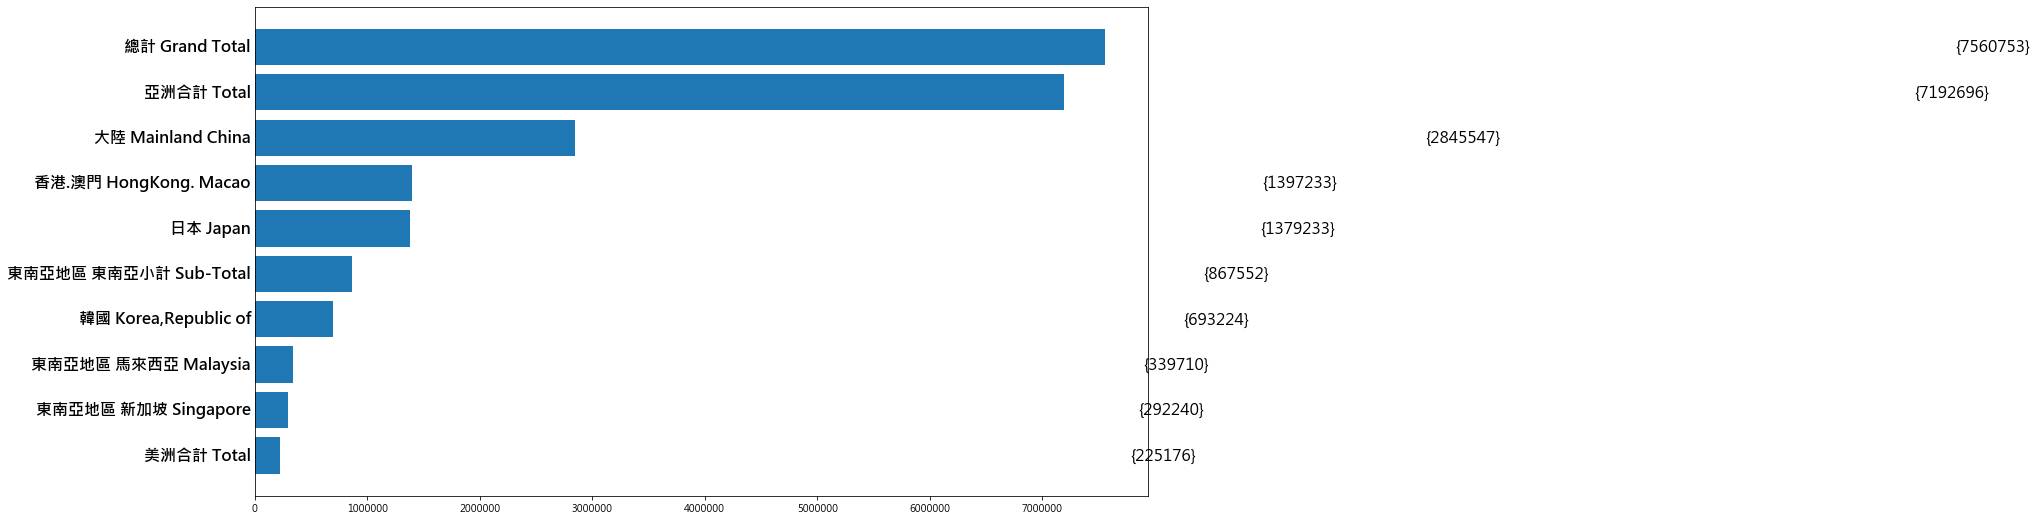

In [5]:
fig, ax = plt.subplots(figsize=(16, 9)) # 在同一個視窗繪製多個圖表
ax.clear() #把之前的直條圖清空
def race_barchart(input_year):
    dff = df[df['年別'].eq(input_year)].sort_values(by='觀光', ascending=True).tail(10)
    ax.clear() #把之前的直條圖清空
    ax.set_yticks([]) #清除y轴原本刻度  
    ax.barh(dff['細分'], dff['觀光'],height=0.8)
    dx = dff['觀光'].max()
    
    for i, (value, name) in enumerate(zip(dff['觀光'], dff['細分'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center') # 圖左依照順序標示name
        ax.text(value+dx, i,{value},  size=16, ha='left',  va='center')# 圖右依照value+dx的距離標示value
        print(i, value, name) 

  
race_barchart('2016')

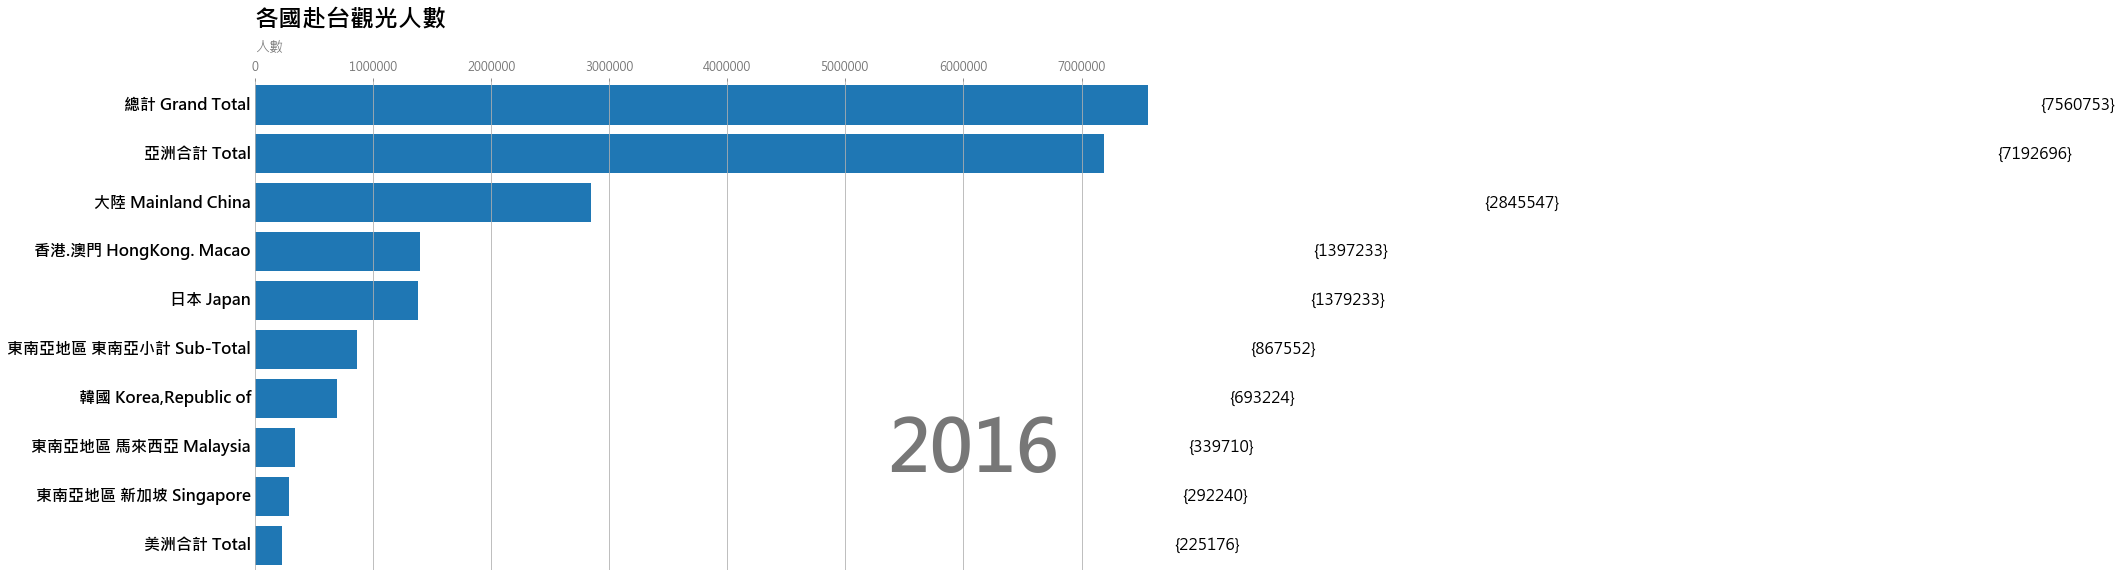

In [6]:
fig, ax = plt.subplots(figsize=(16, 9)) # 在同一個視窗繪製多個圖表

def race_barchart(input_year):
    dff = df[df['年別'].eq(input_year)].sort_values(by='觀光', ascending=True).tail(10)
    ax.clear() 
    ax.set_yticks([]) 
    ax.barh(dff['細分'], dff['觀光'],height=0.8)
    dx = dff['觀光'].max()
    
    for i, (value, name) in enumerate(zip(dff['觀光'], dff['細分'])):
        ax.text(0, i,name+' ',size=16, weight=600, ha='right', va='center') 
        ax.text(value+dx, i,{value},  size=16, ha='left',  va='center')
        
    #右邊大文字標示(年月)        
    ax.text(0.9, 0.2, input_year[:7].replace('-','/'), 
            transform=ax.transAxes, color='#777777', size=72, ha='right', weight=1000)
    
    #左上方小文字標示-旅遊人數 (thousands)
    ax.text(0, 1.06, '人數', transform=ax.transAxes, size=14, color='#777777')
    

    
    #x軸座標改灰色
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    
    #x軸座標改至上方
    ax.xaxis.set_ticks_position('top') 
    ax.set_yticks([]) #清除y轴原本刻度
    ax.margins(0, 0.01) #x轴刻度靠近第一個 bar
    ax.grid(which='major', axis='x', linestyle='-') #格線樣式
    
    #左上方大文字標示-台灣赴各國觀光人數
    ax.text(0, 1.15, '各國赴台觀光人數',
                transform=ax.transAxes, size=24, weight=600, ha='left', va='top')

    plt.box(False) #只刪除邊框, 不刪除刻度標籤
    
race_barchart('2016')

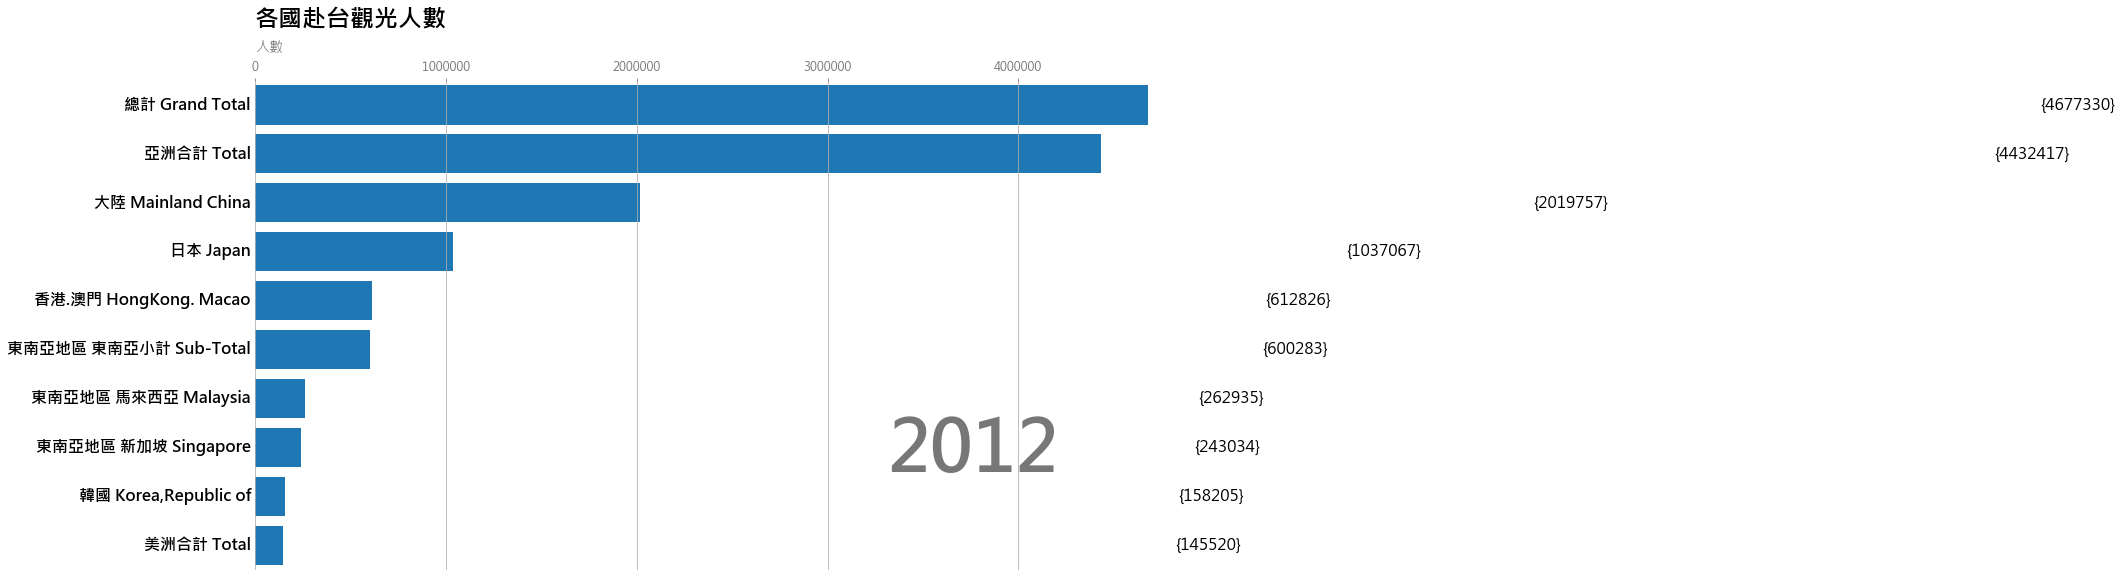

In [7]:
from matplotlib.animation import FuncAnimation
year = list(set(df.年別.values))
year.sort()

fig, ax = plt.subplots(figsize=(16, 9))
animator = animation.FuncAnimation(fig, race_barchart, frames=year)
HTML(animator.to_jshtml())


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


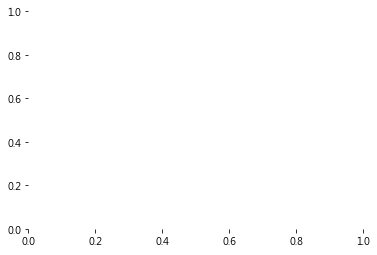

In [15]:
animator.save("來台觀光資料.gif",writer='imagemagick', fps=3)